So far we've learnt the most basic but crucial algorithms a data scientist and a machine learning engineer must know. We've learnt the techniques for classification and regression, and we've done some very rudementary data exploration. Hopefully, you've also done the assignments and the mini projects in the courses we recommended you to do. In this assignment, we give you a very easy dataset on which you can perform both classification and regression tasks. The purpose of this assignment is for you to try your hand out at all the techniques you've learnt so far and work on a real dataset to figure out whether what you learnt up until now works.

## Link to the Dataset

https://archive.ics.uci.edu/ml/datasets/wine+quality

For you to submit this assingment, you'll have to give us the accuracy you're getting on your classification, what algorithms/techniques you used for classification and why. Also, you'll give us the minimum loss you got in your regression, what algorithms/techniques you used and why. Just as last assignment, you'll clone the original folder, work completely on this Jupyter notebook and submit all your work. Also, you'll include in a text cell the above things. Happy playing on this dataset!


## Some things that must be present in the notebook
- Read the dataset and display various details of data (correlation,some statistics etc..)
- Split the data into train test split
- Show some vizualizations
- Models for both classification and regression.
- Show the results clearly and all of them must be on the test set

This [book](https://github.com/dvrg/educate-resource-for-machine-learning/blob/master/6.%20Machine%20Learning%20Mastery%20With%20Python%20Understand%20Your%20Data%2C%20Create%20Accurate%20Models%20and%20work%20Projects%20End-to-End.pdf) is a great resource for data science/predictive modelling in general and can be used as reference book for this task and future. The book highlights all the necessary steps one must take to understand data and build powerful models in a simple and understandable manner. 

### Accuracy on your classification task and the reason you used this algorithm/technique -> 

### Minimum loss on you regression task and the reason you used this algorithm/technique ->

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import tree
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

In [2]:
data=pd.read_csv('winequality-red.csv', sep =';')

In [3]:
### REGRESSION MODEL

In [4]:
print(data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [5]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Text(0.5, 1.0, 'Correlation between variables')

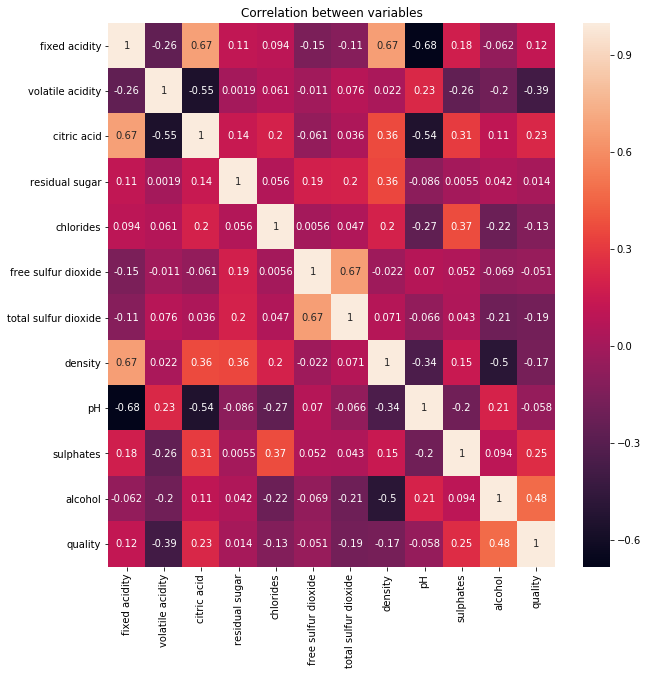

In [8]:
corr = data.corr()
fig, ax = plt.subplots(figsize = (10,10))
g= sns.heatmap(corr,ax=ax, annot= True)
ax.set_title('Correlation between variables')

In [9]:
x = data.iloc[:,:-1]
y = data.quality

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2)

In [11]:
print(x_train.head())

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
989             9.7             0.295         0.40             1.5      0.073   
795            10.8             0.890         0.30             2.6      0.132   
24              6.9             0.400         0.14             2.4      0.085   
1296            6.6             0.630         0.00             4.3      0.093   
107             6.2             0.630         0.31             1.7      0.088   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
989                  14.0                  21.0  0.99556  3.14       0.51   
795                   7.0                  60.0  0.99786  2.99       1.18   
24                   21.0                  40.0  0.99680  3.43       0.63   
1296                 51.0                  77.5  0.99558  3.20       0.45   
107                  15.0                  64.0  0.99690  3.46       0.79   

      alcohol  
989      10.9  
795      10.2  
24

In [12]:
x_train_scaled = preprocessing.scale(x_train)
print(x_train_scaled)

[[ 0.79366629 -1.30469769  0.6426529  ... -1.09933985 -0.85597115
   0.43893575]
 [ 1.42288363  1.99637941  0.13699122 ... -2.06809805  3.09867278
  -0.21644826]
 [-0.80797786 -0.72215467 -0.67206746 ...  0.77359269 -0.14767671
  -0.68457969]
 ...
 [-0.69357471  0.66485251 -0.46980279 ...  0.83817657 -0.32475032
  -1.24633741]
 [ 1.07967417 -1.0550364   1.04718224 ... -0.71183656  0.2064705
   1.56245119]
 [ 0.90806944  1.1641751  -0.41923662 ... -1.09933985 -0.619873
  -0.96545855]]


In [13]:
clf=tree.DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [14]:
confidence = clf.score(x_test, y_test)
print(confidence)

0.621875


In [15]:
y_pred = clf.predict(x_test)

In [16]:
### CLASSIFICATION MODEL

In [17]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [18]:
bins = (2,5.5,8)
group_names = ['bad','good']
categories = pd.cut(data['quality'], bins, labels = group_names)
data['quality'] = categories

In [19]:
data['quality'].value_counts()

good    855
bad     744
Name: quality, dtype: int64

In [20]:
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)
y

array([2, 2, 2, ..., 3, 2, 3], dtype=int64)

In [21]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [22]:
sc = StandardScaler()
x_train1 = sc.fit_transform(x_train1)
x_test1 = sc.transform(x_test1)

In [23]:
classifier = SVC(kernel = 'rbf', random_state = 0, gamma = 0.9)
classifier.fit(x_train1, y_train1)

y_pred1 = classifier.predict(x_test1)

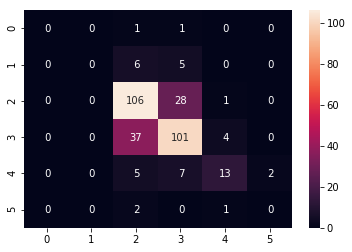

In [24]:
cm = confusion_matrix(y_test1, y_pred1)
sns.heatmap(cm,annot=True,fmt='2.0f')

In [25]:
accuracies = cross_val_score(estimator = classifier, X = x_train1,
                             y = y_train1, cv = 10)
accuracies.mean()

C:\Users\Singh\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


0.6254233906310319

In [26]:
### I was not able to "from sklearn.model_selection import GridSearchCV"